In [3]:
from roboflow import Roboflow
from config import ROBOFLOW_API_KEY

rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace("mihailo").project("smart-football-object-detection-icwha")
version = project.version(3)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.92, to fix: `pip install ultralytics==8.0.196`


In [4]:
import os
import yaml

YAML_PATH = os.path.join(dataset.location,"data.yaml")

with open(YAML_PATH) as f:
     list_doc = yaml.safe_load(f)

list_doc['test'] = '../test/images'
list_doc['train'] = '../train/images'
list_doc['val'] = '../valid/images'

print(list_doc)

with open(YAML_PATH, "w") as f:
    yaml.dump(list_doc, f)

{'names': ['ball', 'goalkeeper', 'player', 'referee'], 'nc': 4, 'roboflow': {'license': 'CC BY 4.0', 'project': 'smart-football-object-detection-icwha', 'url': 'https://universe.roboflow.com/mihailo/smart-football-object-detection-icwha/dataset/3', 'version': 3, 'workspace': 'mihailo'}, 'test': '../test/images', 'train': '../train/images', 'val': '../valid/images'}


In [ ]:
!yolo mode=train model=yolov8s.pt task=detect data={YAML_PATH} epochs=100 patience=20 imgsz=1280 batch=8 plots=True cache=False

Ultralytics YOLOv8.2.91 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/gdrive/MyDrive/yolo_football_train_v4/Smart-Football:-Object-Detection-3/data.yaml, epochs=100, time=None, patience=20, batch=8, imgsz=1280, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False

In [ ]:
!yolo mode=train resume model=runs/detect/train3/weights/last.pt task=detect data={YAML_PATH} epochs=100 patience=20 imgsz=1280 batch=8 plots=True cache=False

Ultralytics YOLOv8.2.91 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=runs/detect/train3/weights/last.pt, data=/gdrive/MyDrive/yolo_football_train_v4/Smart-Football:-Object-Detection-3/data.yaml, epochs=100, time=None, patience=20, batch=8, imgsz=1280, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=runs/detect/train3/weights/last.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fals

In [3]:
RESULTS_DIR = 'runs/detect/train3'

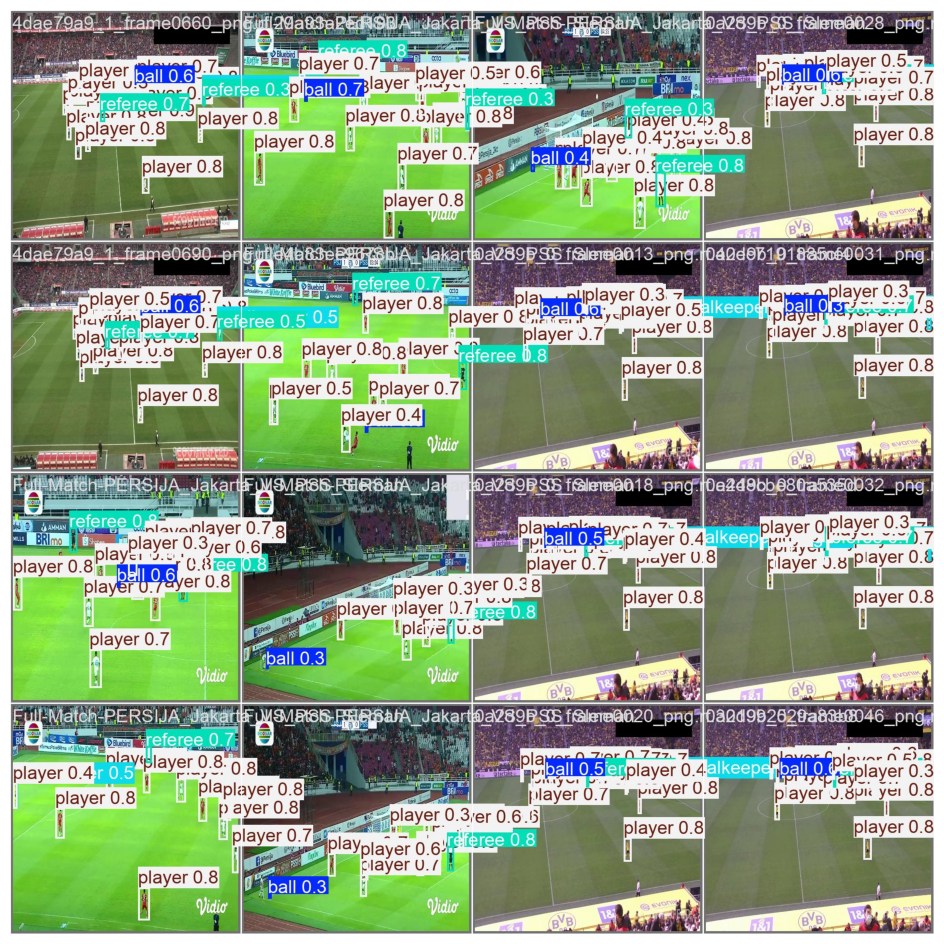

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(12,12))
plt.axis(False)
plt.imshow(mpimg.imread('runs/detect/train3/val_batch0_pred.jpg'))

plt.show()


In [9]:
version.deploy(model_type="yolov8", model_path=RESULTS_DIR)

Dependency ultralytics==8.0.196 is required but found version=8.2.92, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: y
View the status of your deployment at: https://app.roboflow.com/mihailo/smart-football-object-detection-icwha/3
Share your model with the world at: https://universe.roboflow.com/mihailo/smart-football-object-detection-icwha/model/3


In [6]:
import os
import shutil

source_path = f'{RESULTS_DIR}/weights/best.pt'
destination_dir = '../../models'
destination_file = os.path.join(destination_dir, 'object-detection.pt')

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Move and rename the file
try:
    shutil.move(source_path, destination_file)
    print(f"File moved and renamed to {destination_file}")
except FileNotFoundError:
    print(f"Source file '{source_path}' not found.")
except Exception as e:
    print(f"Error occurred: {e}")


File moved and renamed to ../../models\object-detection.pt
